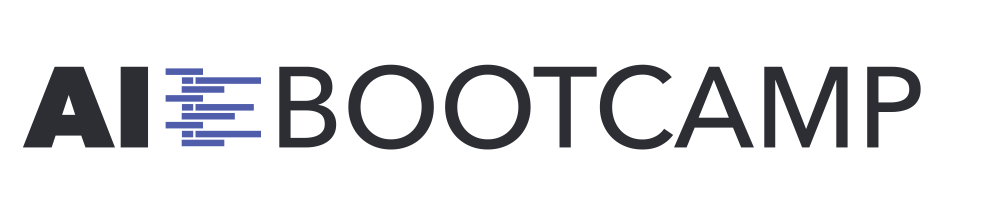

# Tokenization

Author: Thierno Diallo - adapted from EE148 assignment

In this notebook we look at tokenization, the initial step when a model processes natural. Here we will examine, implement and train a variety of tokenizers to better undersatnd the tokenization process which breaking down our initial text into meaningful and small machine digestable tokens of words or character. As machines cannot proccess plain text, each token is assigned a unique ID which is then used to train the machine learning model cosuming the text. Here, we will walk through **Word-based tokenizers, Character-based tokenizers, and lastly the Byte-Pair Encoding tokenizer**

## Word-based Tokenizer

Word-based tokenizers split a text into individual words often based on spaces or punctuation. For example the sentence:

**"He's a happy cat."** coudl be split by a word-based tokenizer as follows:

- **Split on spaces:** ["He's", 'a', 'happy', 'cat.']
- **Split on punctuation:** ['He', " ' ", 's', 'a', 'happy', 'cat', '.']

As you can see these are fairly simply to implment, however, there are many variations of word tokenizers for spiliting up punction alongside different way of handling gerunds, plural forms, proper nouns and many other complexities of the english langauge. These variations exists ti reduce our vocabularity set hence the model does not view "hiking", "hike", "hikes" and "hiked" as four distinct tokens for example, but views them as being similar.


In [ ]:
# Imports
import re
from typing import Dict, Tuple, List
from collections import defaultdict
from operator import itemgetter

In [ ]:
text = '''The Transformers movie franchise, based on the iconic toy line,
brings the battle between the Autobots and Decepticons to life. First released
in 2007, the films follow Optimus Prime and his team of heroic robots as they
protect Earth from their nemeses, led by the ruthless Megatron. Directed
by Michael Bay and featuring a stellar cast, they're a truly phenomenonal movies.'''

"""
Implement the split on space word tokenizer below. Do not worry about assinging
a unique ID to each tokenized word. The function should take in text and return
a list of words split by spaces.
"""
def WordTokenizer(text):
  return text.split(' ')

"""
Implement the split on punctuation word tokenizer below. Do not worry about assinging
a unique ID to each tokenized word. The function should take in text and return
a list of words, characters and/or punctuations split by spaces and punctuation.
"""
def PunctuationWordTokenizer(text):
  return re.findall(r"\w+|[^\w\s]", text)

word_tokens = WordTokenizer(text)
punctuation_word_tokens = PunctuationWordTokenizer(text)

print("\nSpace split word tokens:\n", word_tokens)
print("\nPunctuation split Word tokens:\n", punctuation_word_tokens)


Space split word tokens:
 ['The', 'Transformers', 'movie', 'franchise,', 'based', 'on', 'the', 'iconic', 'toy', 'line,\nbrings', 'the', 'battle', 'between', 'the', 'Autobots', 'and', 'Decepticons', 'to', 'life.', 'First', 'released\nin', '2007,', 'the', 'films', 'follow', 'Optimus', 'Prime', 'and', 'his', 'team', 'of', 'heroic', 'robots', 'as', 'they\nprotect', 'Earth', 'from', 'their', 'nemeses,', 'led', 'by', 'the', 'ruthless', 'Megatron.', 'Directed\nby', 'Michael', 'Bay', 'and', 'featuring', 'a', 'stellar', 'cast,', "they're", 'a', 'truly', 'phenomenonal', 'movies.']

Punctuation split Word tokens:
 ['The', 'Transformers', 'movie', 'franchise', ',', 'based', 'on', 'the', 'iconic', 'toy', 'line', ',', 'brings', 'the', 'battle', 'between', 'the', 'Autobots', 'and', 'Decepticons', 'to', 'life', '.', 'First', 'released', 'in', '2007', ',', 'the', 'films', 'follow', 'Optimus', 'Prime', 'and', 'his', 'team', 'of', 'heroic', 'robots', 'as', 'they', 'protect', 'Earth', 'from', 'their', 'n

# Character-based Tokenizers

Character-based tokenizers split text into individual characters, treating each letter, digit, or symbol as a separate token. For instance, consider the sentence:

**"He's a happy cat."** A character-based tokenizer would break it down as follows:

['H', 'e', " ' ", 's', 'a', 'h', 'a', 'p', 'p', 'y', 'c', 'a', 't', '.']

This approach is particularly useful in tasks that require a fine-grained understanding of text, such as handling rare or unknown words. However, character tokenization often results in a significantly larger number of tokens and may lose some of the contextual information provided by word-level tokenization.

In [ ]:
def CharacterTokenizer(text):
  return list(text)

character_tokens = CharacterTokenizer(text)

print("\nCharacter tokens:\n", character_tokens)


Character tokens:
 ['T', 'h', 'e', ' ', 'T', 'r', 'a', 'n', 's', 'f', 'o', 'r', 'm', 'e', 'r', 's', ' ', 'm', 'o', 'v', 'i', 'e', ' ', 'f', 'r', 'a', 'n', 'c', 'h', 'i', 's', 'e', ',', ' ', 'b', 'a', 's', 'e', 'd', ' ', 'o', 'n', ' ', 't', 'h', 'e', ' ', 'i', 'c', 'o', 'n', 'i', 'c', ' ', 't', 'o', 'y', ' ', 'l', 'i', 'n', 'e', ',', '\n', 'b', 'r', 'i', 'n', 'g', 's', ' ', 't', 'h', 'e', ' ', 'b', 'a', 't', 't', 'l', 'e', ' ', 'b', 'e', 't', 'w', 'e', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'A', 'u', 't', 'o', 'b', 'o', 't', 's', ' ', 'a', 'n', 'd', ' ', 'D', 'e', 'c', 'e', 'p', 't', 'i', 'c', 'o', 'n', 's', ' ', 't', 'o', ' ', 'l', 'i', 'f', 'e', '.', ' ', 'F', 'i', 'r', 's', 't', ' ', 'r', 'e', 'l', 'e', 'a', 's', 'e', 'd', '\n', 'i', 'n', ' ', '2', '0', '0', '7', ',', ' ', 't', 'h', 'e', ' ', 'f', 'i', 'l', 'm', 's', ' ', 'f', 'o', 'l', 'l', 'o', 'w', ' ', 'O', 'p', 't', 'i', 'm', 'u', 's', ' ', 'P', 'r', 'i', 'm', 'e', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 't', 'e', 'a', 'm', ' 

# Byte-Pair Encoding Tokinizer

The Byte-Pair Encoder (BPE) was proposed originally as a text compression alogrithm back in 1994 before being adopted as tokenizer for training transformer models such as GPT, OPT, BLOOM, Llama, GPT-2, RoBERTa, BART and more. OpenAI still utilizes a Byte-Pair Encoding tokinizer even in their recent o1 models showing how powerfull this tokinizer is.

The BPE tokinizer works as follows:
- First, the algorithm finds all of the unique words in the corpus, which is simply the pre-processed text before it is tokenized. In this preproccesing step, certain words like articles and punctuation might be removed or hyphenated words might be edited for example.

    - **Example Input Corpus:** `"He's a happy cat."`
    - **Example Preprocessed Corpus:** `"he_happy_cat"`
    - **Unique Words in Corpus:** `['he', 'happy', 'cat', '_']`

- Next, the algorithm splits each of the unique words in our corpus into charactes and adds all unique characters to it's vocabulary set with it's index as its unique ID.
    - **Splits:**
                {
                  ('h', 'e', '_'): 1,
                  ('h', 'a', 'p', 'p', 'y', '_'): 1,
                  ('c', 'a', 't', '_'): 1
                }

    - **Vocabulary:** `{'_': 0, 'e': 1, 't': 2, 'a': 3, 'p': 4, 'c': 5, 'h': 6, 'y': 7}`

- Next, the algorithm performs a pairwise sliding window over the splits counting the frequency of each pair. Then, we take the pair with the highest frequency and add it to our vocabulary. If a tie then we can arbitraty pick any pair to add.
After ading a pair to the vocabulary, it also updates the the orginal split of the cropus into characters to include that merged pair everywhere it appears as a single "character"/split. In the below example let us chose the pair `('h', 'e')`

    - **Pair Counts:**
        ```
        ('h', 'e'): 1
        ('e', '_'): 1
        ('h', 'a'): 1
        ('a', 'p'): 1
        ('p', 'p'): 1
        ('p', 'y'): 1
        ('y', '_'): 1
        ('c', 'a'): 1
        ('a', 't'): 1
        ('t', '_'): 1
        ```
    - **Updated Vocabulary:**
          { 'h': 0, 'e': 1,
            '_': 2, 'a': 3,
            'p': 4, 'y': 5,
            'c': 6, 't': 7,
            ('h', 'e'): 8 }

    - **Updated Splits:**

          { ('he', '_'): 1,
            ('h', 'a', 'p', 'p', 'y', '_'): 1,
            ('c', 'a', 't', '_'): 1 }

- Lastly, we perform the pairwise sliding window again over our new splits adding the pair with the highest frequency to our vocabulary and updating the splits to include that merged pair. We repeat this until, we have reached the preset desired vocabulary size.

In [ ]:
class BytePairEncoder:
    def __init__(self):
        pass

    def _get_pair_counts(
        self,
        word_count: Dict[Tuple[str, ...], int]
    ) -> Dict[Tuple[str, str], int]:
        """
        Input:
          - word_count: a dictionary where the keys are all words (broken into
                        a tuple of characters) in the corpus and the values
                        are the counts

        Output:
          - pair_count: a dictionary where the keys are all pairs of
                        consecutive characters and the values are the counts
        """

        pair_count = defaultdict(int)
        for chars, count in word_count.items():
            for i in range(len(chars) - 1):
                pair = (chars[i], chars[i + 1])
                pair_count[pair] += count

        return pair_count

    def _merge_pair(
        self, word_count: Dict[Tuple[str, ...], int], pair: Tuple[str, str]
    ) -> Dict[Tuple[str, ...], int]:
        """
        Input:
          - word_count: a dictionary where the keys are all words (broken into
                        a tuple of characters) in the corpus and the values
                        are the counts
          - pair: a pair of characters to be merged

        Output:
          - word_count_new: updated dictionary according to the given pair to
                            be merged
        """

        word_count_new = defaultdict(int)
        for chars, count in word_count.items():
            chars_new = []
            i = 0
            while i < len(chars):
                if i < len(chars) - 1 and (chars[i], chars[i+1]) == pair:
                    chars_new.append(pair[0] + pair[1])
                    i += 2
                else:
                    chars_new.append(chars[i])
                    i += 1
            word_count_new[tuple(chars_new)] = count

        return word_count_new

    def train(self, corpus: str, num_merges: int = 5) -> Dict[str, int]:
        """
        Input:
          - corpus: a string of text for training the BPE encoding
          - num_merges: number of new vocabularies obtained from the corpus via training

        Output:
          - self.vocabs: a dictionary of vocabularies obtained from the corpus via training
        """

        # step 1: normalization
        corpus = corpus.lower()
        corpus = corpus.replace(",", "")
        corpus = corpus.replace("!", "")
        corpus = corpus.replace(" ", "_")

        # step 2: pre-tokenization
        word_list = corpus.split("_")
        word_list = [w + "_" for w in word_list]

        # step 3: learning from the word list
        word_count = defaultdict(int)
        for w in word_list:
            word_count[tuple([*w])] += 1

        print("=" * 100)
        print("Your BPE learning")
        print("=" * 100)

        self.vocab = {c: i for i, c in enumerate(set(corpus))}
        self.new_vocab = {}
        n = len(self.vocab)
        for i in range(num_merges):
            # count the number of occurrences of each pair of characters
            pair_count = self._get_pair_counts(word_count)
            if not pair_count:
                break

            most_frequent_pair = max(pair_count, key=pair_count.get)

            # add the most frequent pair to the vocabulary
            self.vocab[most_frequent_pair] = n + i
            self.new_vocab[most_frequent_pair] = n + i

            # print info
            print("iteration:", i)
            print("added to vocabulary: ", self.new_vocab)
            print("most frequent pair:", most_frequent_pair)
            print("")

            # merge the most frequent pair
            word_count = self._merge_pair(word_count, most_frequent_pair)

        print("final vocabulary: ", self.vocab)
        print("")

        return self.vocab

    def _get_pairs(self, text: List[str]) -> List[Tuple[str, str]]:
        """
        Input:
          - text: a list of strings for BPE encoding

        Output:
          - pairs: a list of consecutive pairs of characters
        """

        pairs = []
        prev_char = text[0]
        for char in text[1:]:
            pairs.append((prev_char, char))
            prev_char = char

        return pairs

    def _merge_pair_for_text(
        self, text: List[str], pair_to_merge: Tuple[str, str]
    ) -> List[str]:
        """
        Input:
          - text: a list of strings
          - pair_to_merge: a tuple of characters to be merged

        Output:
          - new_text: a new list of strings where the given pair of characters
                      is merged
        """

        first, second = pair_to_merge
        new_text = []

        i = 0
        while i < len(text):
            if i < len(text) - 1 and text[i] == first and text[i + 1] == second:
                new_text.append(first + second)
                i += 2
            else:
                new_text.append(text[i])
                i += 1

        return new_text

    def encode(self, raw_text: str) -> Tuple[List[str], List[int]]:
        """
        Input:
          - raw_text: given text in string
          - pair_to_merge: a tuple of characters to be merged

        Output:
          - text: a list of strings where each string is vocabulary
          - encoding: a list of integer ids of the strings in text
        """

        # step 1: normalization
        raw_text = raw_text.lower()
        raw_text = raw_text.replace(" ", "_")

        # step 2: pre-tokenization
        text = list(raw_text)
        text.append("_")

        # step 3: encode the given text
        print("=" * 100)
        print("Your BPE encoding")
        print("=" * 100)

        i = 0
        while True:
            # get all pairs of charactors
            pairs = self._get_pairs(text)
            vocab_pairs = [
                (pair, self.vocab[pair]) for pair in pairs if pair in self.vocab
            ]
            if not vocab_pairs:
                break

            # select the next pair for merging
            pair_to_merge = min(vocab_pairs, key=itemgetter(1))[0]
            text = self._merge_pair_for_text(text, pair_to_merge)

            # print info
            print("iteration:", i)
            print("pair to merge:", pair_to_merge)
            print("text: ", text)
            print("")

            i += 1

        # get a list of indices for the tokens
        vocab_short = {}
        for key, value in self.vocab.items():
            if isinstance(key, tuple):
                vocab_short[str(key[0]) + str(key[1])] = value
            else:
                vocab_short[key] = value
        # handle unknow tokens and sets them to -1
        encoding = [vocab_short.get(token, -1) for token in text]

        return text, encoding

In [ ]:
corpus = """Born in the German Empire, Einstein moved to Switzerland in 1895,
forsaking his German citizenship the following year. In 1897, at the age of
seventeen he enrolled in the mathematics and physics teaching diploma program
at the Swiss Federal Polytechnic School in Zurich, graduating in 1900.
He acquired Swiss citizenship a year later and afterwards secured a permanent
position at the Swiss Patent Office in Bern. In 1905, he submitted a successful
PhD dissertation to the University of Zurich"""
NUM_MERGES = 20
bpe = BytePairEncoder()
bpe.train(corpus=corpus,num_merges=NUM_MERGES)

tokens, embeddings = bpe.encode(text)

print("Tokens: \n", tokens)
print("\nEmbeddings: \n", embeddings)

Your BPE learning
iteration: 0
added to vocabulary:  {('n', '_'): 33}
most frequent pair: ('n', '_')

iteration: 1
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34}
most frequent pair: ('e', '_')

iteration: 2
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34, ('h', 'e_'): 35}
most frequent pair: ('h', 'e_')

iteration: 3
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34, ('h', 'e_'): 35, ('e', 'r'): 36}
most frequent pair: ('e', 'r')

iteration: 4
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34, ('h', 'e_'): 35, ('e', 'r'): 36, ('i', 'n_'): 37}
most frequent pair: ('i', 'n_')

iteration: 5
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34, ('h', 'e_'): 35, ('e', 'r'): 36, ('i', 'n_'): 37, ('d', '_'): 38}
most frequent pair: ('d', '_')

iteration: 6
added to vocabulary:  {('n', '_'): 33, ('e', '_'): 34, ('h', 'e_'): 35, ('e', 'r'): 36, ('i', 'n_'): 37, ('d', '_'): 38, ('a', 't'): 39}
most frequent pair: ('a', 't')

iteration: 7
added to vocabulary:  {('n', '_'): 